In [10]:
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
from ipywidgets import interactive

%matplotlib inline

In [11]:
def load_test(path):
    spec = importlib.util.spec_from_file_location("test", path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    for sym in ['r', 'g', 'b', 'h', 's', 'v']:
        a = np.array(getattr(module, sym))
        setattr(module, sym, a)
    return module

path = "/home/martin/code/musicmouse/espmusicmouse/.pio/build/native/swipe.py"
path = "/home/martin/code/musicmouse/espmusicmouse/.pio/build/native/reverse_swipe.py"
res = load_test(path)

In [12]:
def plot_v(t):
    plt.figure(2)
    plt.ylim(-0.1, 1.1)    
    plt.plot(res.v[t], label=f"v at {t}")
    plt.legend()
    plt.show()

interactive_plot = interactive(plot_v, t=(0, len(res.v)-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=99, description='t', max=199), Output(layout=Layout(height='350px'))), _…

In [9]:
res.r[70]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1])

## Bell Curve

In [14]:
def bell_curve_approximation_old(x, inverse_width):
    if x < 0:
        x = -x
    
    nx = x * inverse_width  * 4
    if nx > 2:
        return 0
        
    x2 = nx * nx
    x3 = x2 * nx
    res = 1 + 0.2760695894 * x3 - 0.8021391 * x2
    
    return res if res > 0 else 0


def bell_curve_approximation(x, inverse_width):  
    nx = x * inverse_width  * 4
    x2 = nx * nx
    x3 = x2 * nx
    res = 1 + 0.2760695894 * x3 - 0.8021391 * x2
    
    return res if res > 0 else 0

# // Function start at 0 (x=0) and goes smoothly up to 1 and arrives 1 at x=width
# // inverse width has to be 1 / width (should be cached outside)
def step_function(x, width, inverse_width):
    if x < 0:
        return 0
    if x >= width:
        return 1
    bell_inv_width = inverse_width * 0.5
    nx = (-x + width) * bell_inv_width  * 4
    x2 = nx * nx
    x3 = x2 * nx
    res = 1 + 0.2760695894 * x3 - 0.8021391 * x2
    return res

In [15]:
x = np.linspace(-1, 10, 20)
y = np.array([step_function(x_i, 8,  1 / 8) for x_i in x])

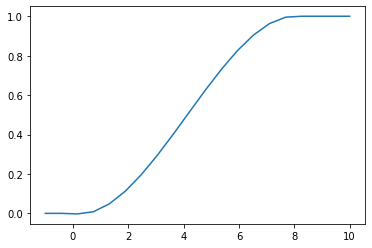

In [16]:
plt.plot(x, y)